In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [8]:
titanic_df.replace({False: 0, True: 1}, inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [9]:
import missingno as msn

<Axes: >

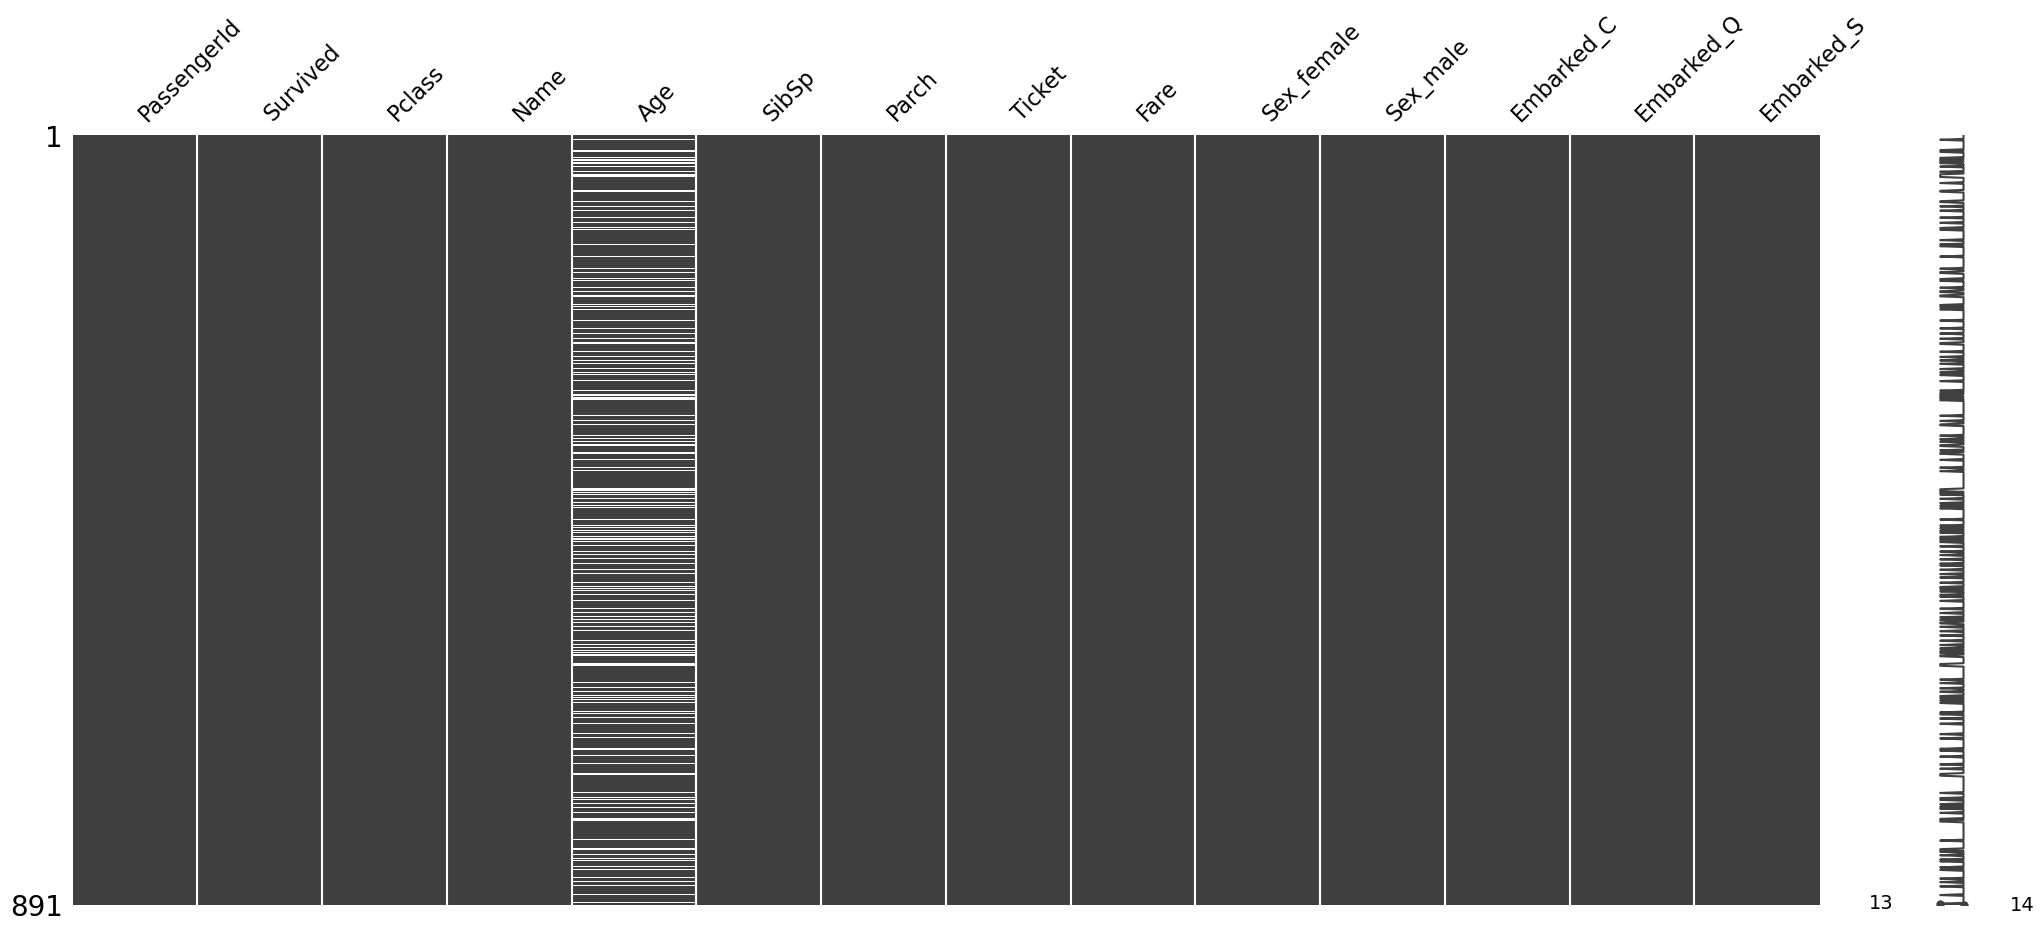

In [10]:
msn.matrix(titanic_df)

In [11]:
titanic_df['Age'].isna().sum() * 100 / titanic_df.shape[0] # Percwntage of missing data

19.865319865319865

In [12]:
titanic_df['Age'].ffill(inplace=True) # Forward fill missing data

In [13]:
# Drop unique features, they are not relevant for prediction
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [14]:
X = titanic_df.drop(columns=['Survived']).to_numpy() # Features
y = titanic_df['Survived'].to_numpy() # Target variable

print(X.shape, y.shape)

(891, 10) (891,)


### Data spliting

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=.2, random_state=45)

# Training and development split
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=.2, random_state=5)

### Modelling and evaluation

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

In [18]:
import matplotlib.pyplot as plt

Accuracy:  0.73


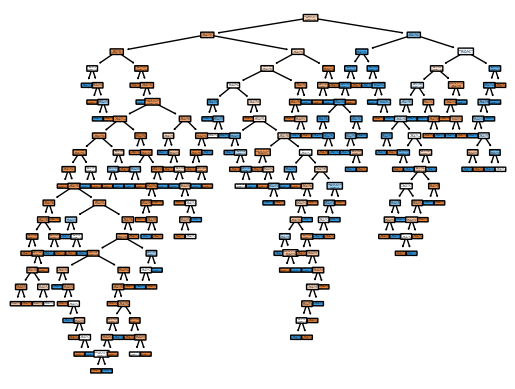

In [19]:
unpruned = DecisionTreeClassifier()
unpruned.fit(X_train, y_train)
pred = unpruned.predict(X_dev)
print('Accuracy: ', round(accuracy_score(y_dev, pred), 2))
# fig = plt.figure()
des_tree = plot_tree(unpruned, filled=True, feature_names=list(titanic_df.drop(columns=['Survived']).columns),
                     rounded=True, proportion=False)
plt.savefig("unpruned_tree.png")

# tree.plot_tree(pruned,feature_names = iris.feature_names, 
#                      rounded = True, proportion = False, precision = 2, filled = True)

In [20]:
# export_graphviz()

In [21]:
accuracy_list = []
for depth in range(1, 11):
    algo = DecisionTreeClassifier(max_depth=depth)
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_dev)
    acc = accuracy_score(y_dev, y_pred)
    accuracy_list.append(round(acc, 2))

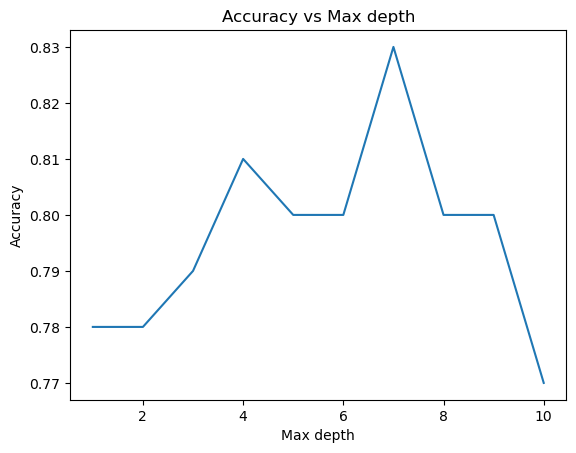

In [22]:
# plt.figure(figsize=(5, 10))
plt.plot(range(1, 11), accuracy_list)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max depth')
# plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

In [23]:
algorithm = DecisionTreeClassifier(max_depth=4)
algorithm.fit(X_train, y_train)
y_pred = algorithm.predict(X_test)
print('Accuracy at depth 4: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy at depth 4:  0.84


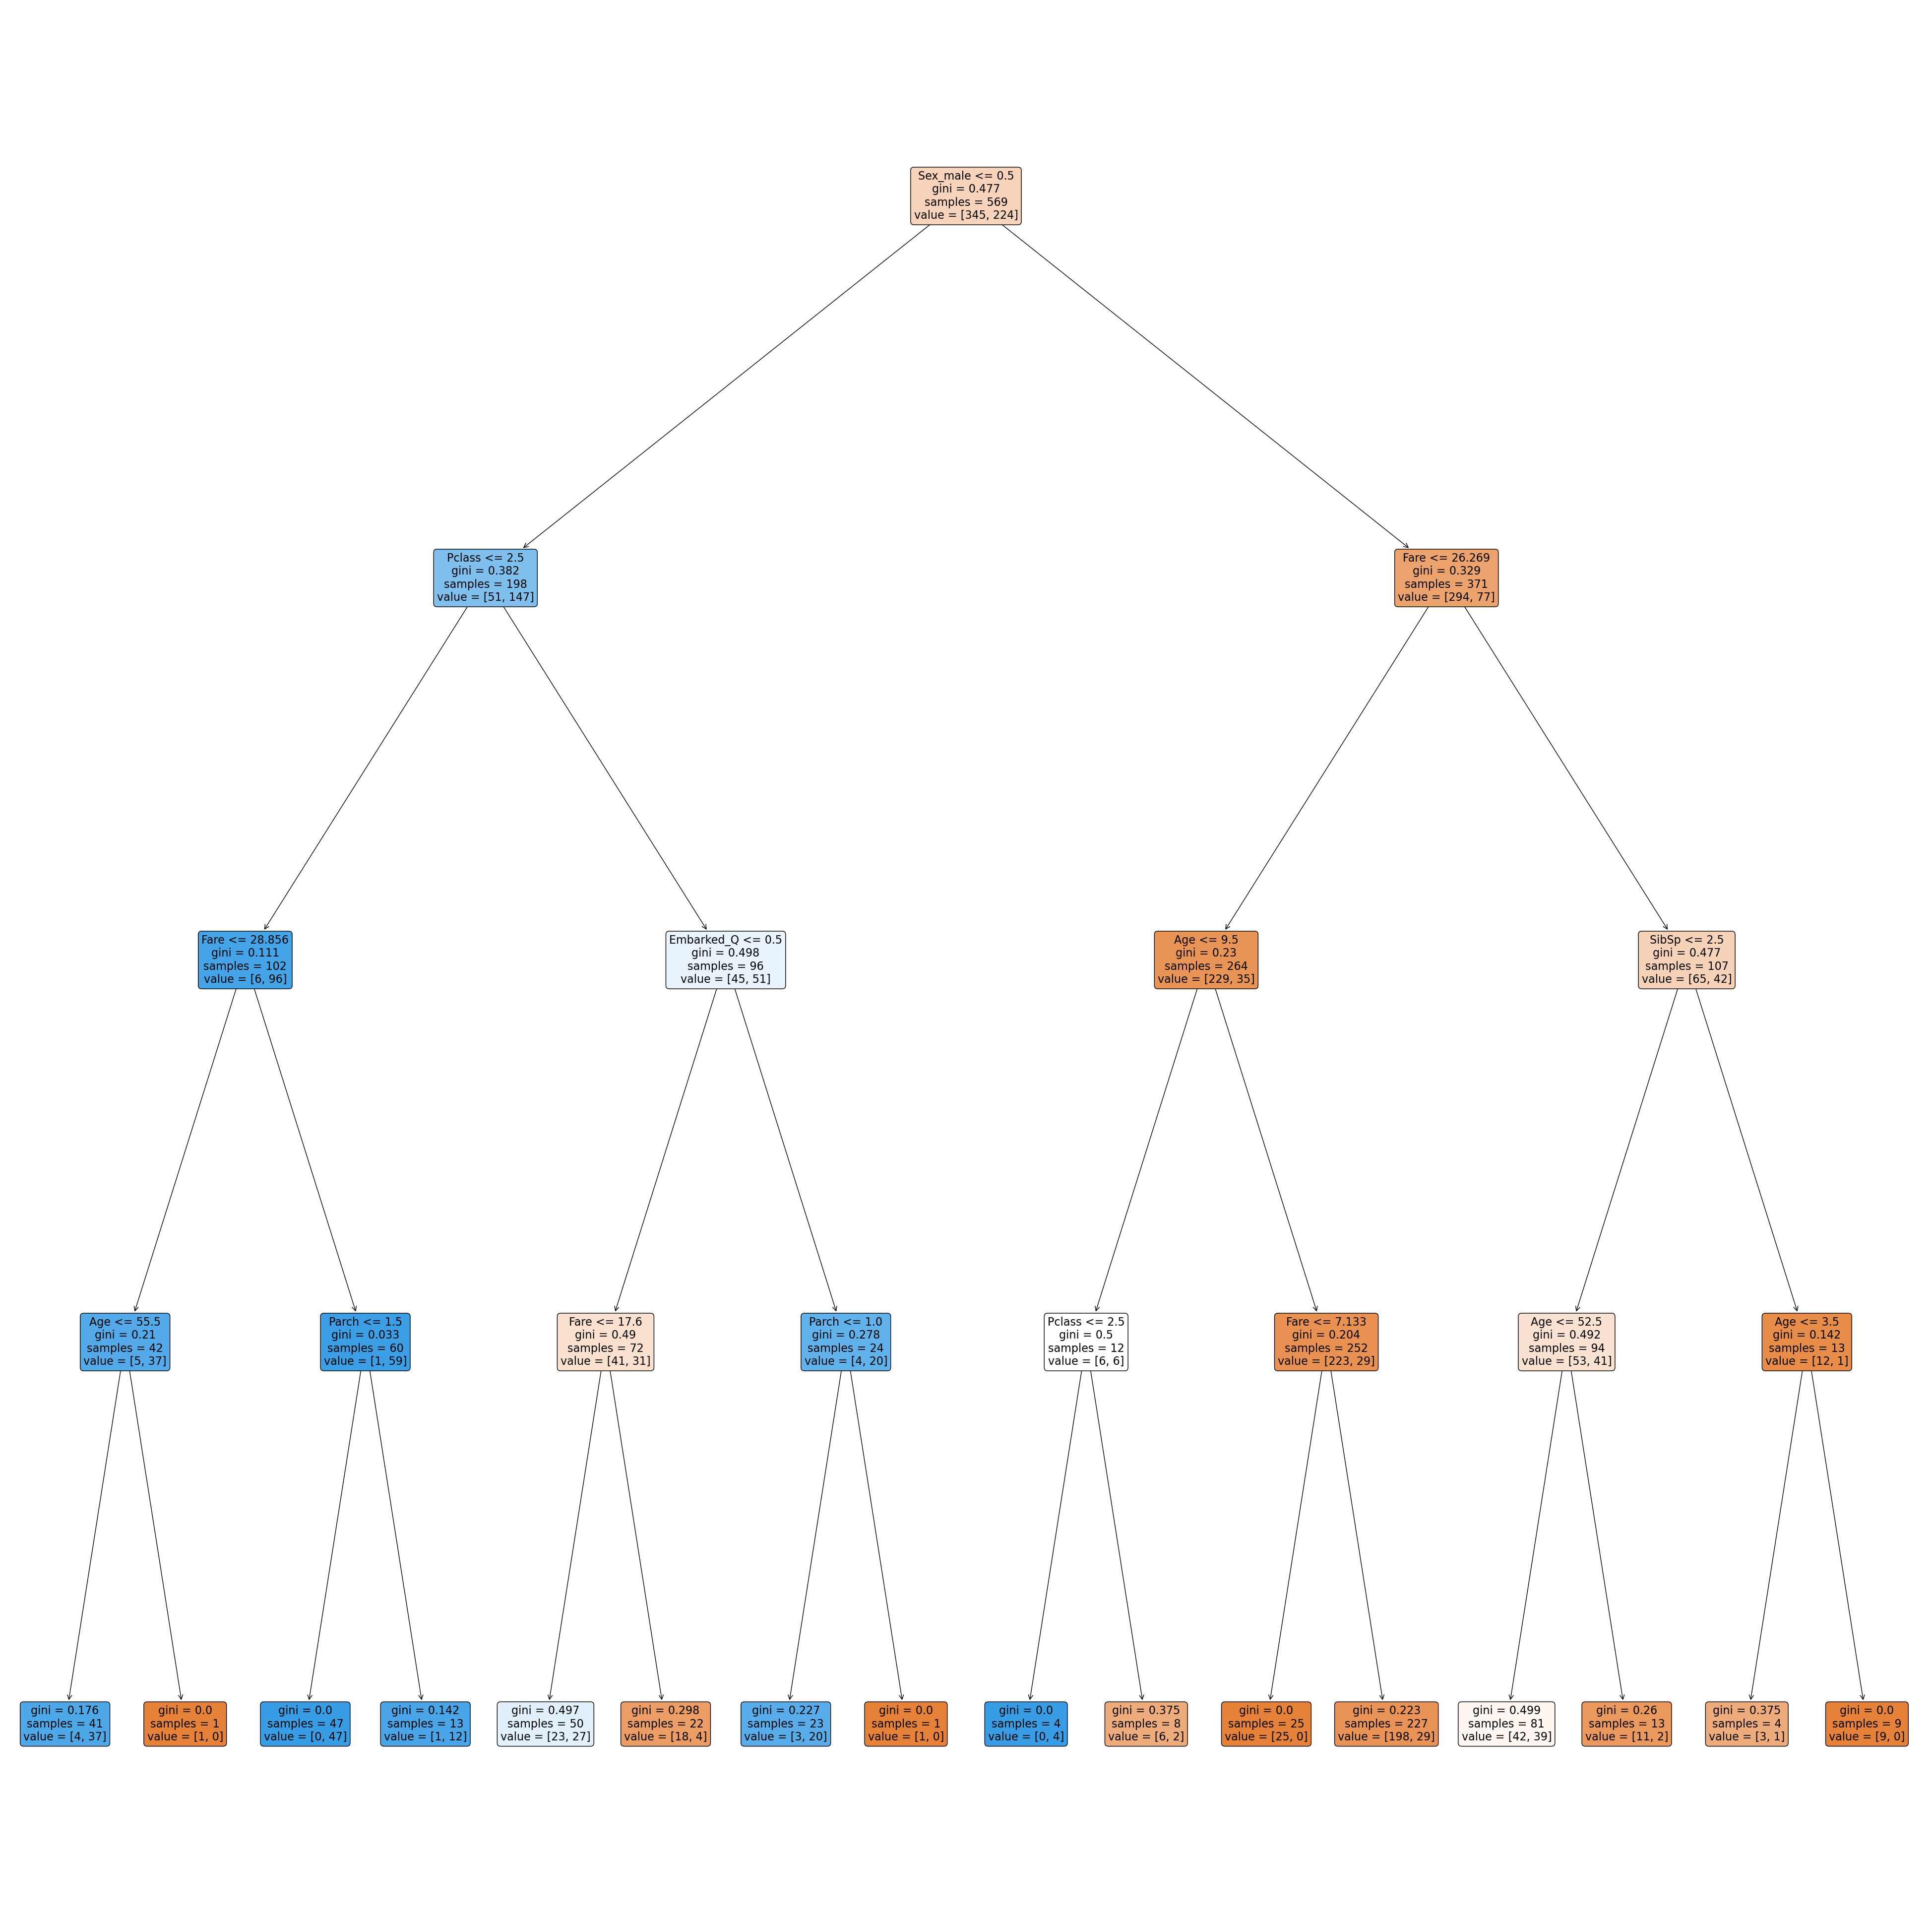

In [28]:
plt.figure(figsize=(50, 50))
tree_4 = plot_tree(algorithm, filled=True, feature_names=list(titanic_df.drop(columns=['Survived']).columns),
                   rounded=True, proportion=False)
plt.savefig('final_tree.png')